# EDA with Python and applying logistic regression


##### for this lecture we will be working with the --Titanic data set from Kaggle--. this is a very famous data set and very often is a studen first step in mechine learning!

#### We'll be trying to predict a classification- survival or deceased. Let's begin our implementing logistic  Regression in python for classification.

#### We'll use a "semi-cleaned" version of the titanic data set. if you use the data set hosted directlyon kaggle. you may need to do some additional cleaning not shown in this lecture notebook.


### Import Libraries

#### Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The Data


#### Let's start by reading in the titanic_train.csv file into a pandas dataframe

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

#### Let's begin some exploratory data analysis! We'll start by checking out missing data!


### Missing Data

#### We can use seaborn to create a simple heatmap to see where we are missing data!

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

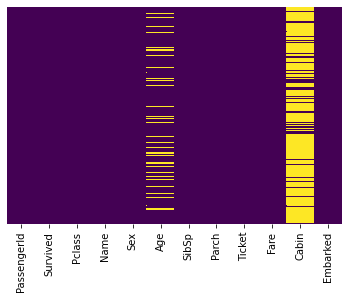

In [8]:
sns.heatmap(train.isnull(),yticklabels=False ,cbar=False,cmap='viridis')

Roughly 20 percent of the age data is missing. The proportion of age missing is likely small enough for reasonable replace with some of imputation.Looking at the column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop the later, orchange it to another feature like 'Cabin Known: 1 or 0'.

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<AxesSubplot:xlabel='Survived', ylabel='count'>

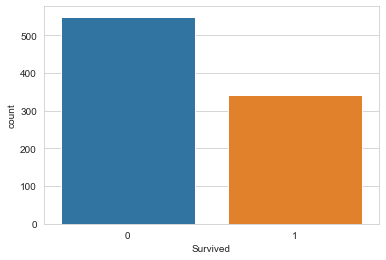

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

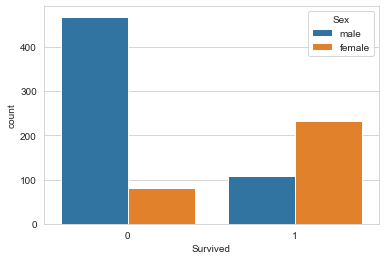

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

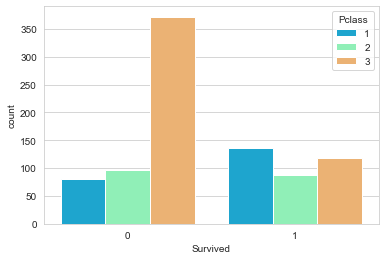

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

<AxesSubplot:xlabel='Age'>

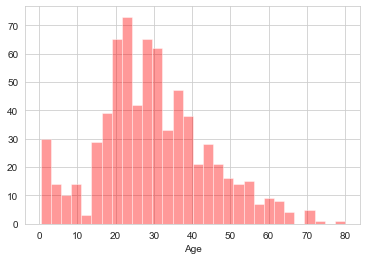

In [36]:
sns.distplot(train['Age'].dropna(), kde=False,color='r', bins=30)

<AxesSubplot:>

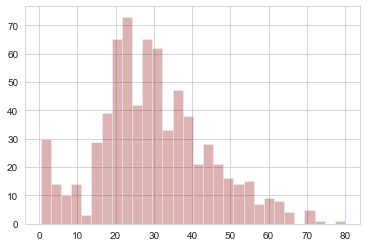

In [39]:
train['Age'].hist(bins=30,color= 'darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

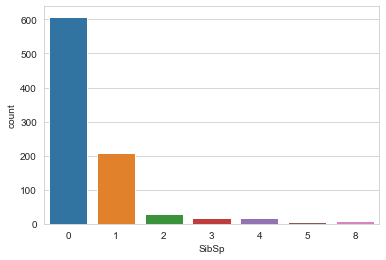

In [40]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

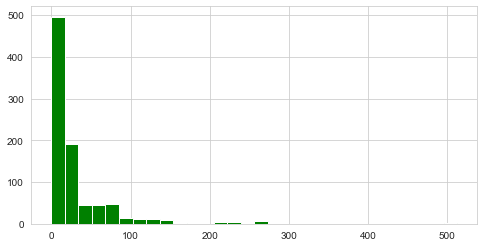

In [42]:
train['Fare'].hist(color='green',bins=30,figsize=(8,4))

### Cufflinks for plots

Let's take a quick moment to show an example of cuffilinks!

## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers(imputation). however we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

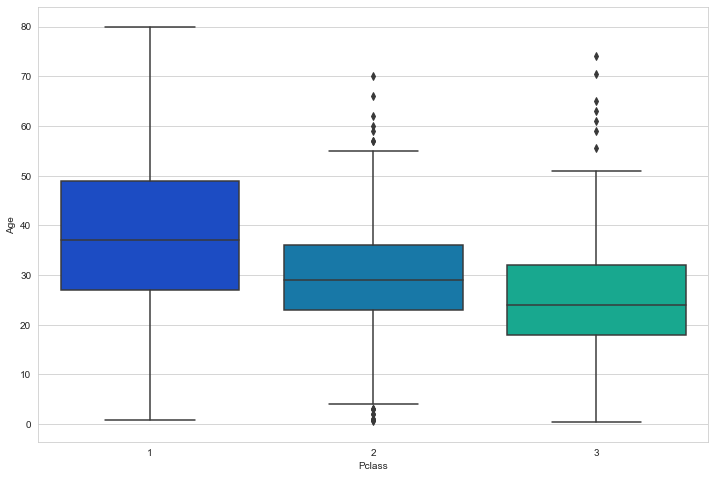

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=train, palette="winter")

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age

In [50]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    
    else:
        return Age

Now apply the function!

In [51]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

Now let's check that heatmap again!

<AxesSubplot:>

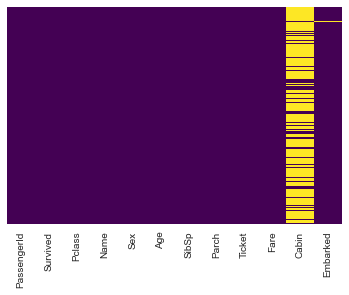

In [55]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the cabin column and the row in embarked that NaN.

In [58]:
train.drop('Cabin',axis=1,inplace=True)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

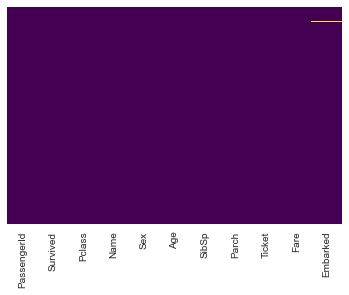

In [60]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Convertin Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our mechine learning algorithn won't be able to directly take in those feature as inputs.

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [62]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [63]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [65]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [67]:
train = pd.concat([train,sex,embark],axis=1)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our mode!

## Building a Logistic Regression model

Let's start by splitting our data into a training set and test set(there is another test.csvfile that you can play around with case you want to use all this data for training).

### Train Test Split

In [69]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [70]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                   train['Survived'],test_size=0.30,
                                                   random_state=101)

### Training and Predicting

In [73]:
from sklearn.linear_model import LogisticRegression

In [78]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\rajib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
predictions = logmodel.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix

In [82]:
accuracy=confusion_matrix(y_test,predictions)

In [83]:
accuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7686567164179104

In [87]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)